<a href="https://colab.research.google.com/github/pr509/fruit-prediction/blob/main/market.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sea
import datetime as dt

In [2]:
import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree

In [3]:
retail=pd.read_csv('OnlineRetail.csv',encoding='ISO-8859-1')
retail.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,01-12-2010 08:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,01-12-2010 08:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,01-12-2010 08:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,01-12-2010 08:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,01-12-2010 08:26,3.39,17850.0,United Kingdom


In [4]:
retail.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49445 entries, 0 to 49444
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   InvoiceNo    49445 non-null  object 
 1   StockCode    49445 non-null  object 
 2   Description  49303 non-null  object 
 3   Quantity     49445 non-null  int64  
 4   InvoiceDate  49445 non-null  object 
 5   UnitPrice    49445 non-null  float64
 6   CustomerID   31563 non-null  float64
 7   Country      49444 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 3.0+ MB


In [5]:
retail.describe()

,Quantity,UnitPrice,CustomerID
count,49445.000000,49445.000000,31563.000000
mean,8.315239,6.458260,15423.016823
std,55.832343,167.436019,1753.298111
min,-9360.000000,0.000000,12347.000000
25%,1.000000,1.250000,14051.000000
50%,2.000000,2.510000,15464.000000
75%,8.000000,4.250000,17041.000000
max,2880.000000,16888.020000,18283.000000


In [6]:
retail.isnull().sum()

InvoiceNo          0
StockCode          0
Description      142
Quantity           0
InvoiceDate        0
UnitPrice          0
CustomerID     17882
Country            1
dtype: int64

In [7]:
(retail.isnull().sum()/retail.shape[0])*100

InvoiceNo       0.000000
StockCode       0.000000
Description     0.287188
Quantity        0.000000
InvoiceDate     0.000000
UnitPrice       0.000000
CustomerID     36.165436
Country         0.002022
dtype: float64

In [8]:
inv_no=list(retail[retail.CustomerID.isnull()].InvoiceNo)

In [9]:
inv_no

['536414',
 '536544',
 '536544',
 '536544',
 '536544',
 '536544',
 '536544',
 '536544',
 '536544',
 '536544',
 '536544',
 '536544',
 '536544',
 '536544',
 '536544',
 '536544',
 '536544',
 '536544',
 '536544',
 '536544',
 '536544',
 '536544',
 '536544',
 '536544',
 '536544',
 '536544',
 '536544',
 '536544',
 '536544',
 '536544',
 '536544',
 '536544',
 '536544',
 '536544',
 '536544',
 '536544',
 '536544',
 '536544',
 '536544',
 '536544',
 '536544',
 '536544',
 '536544',
 '536544',
 '536544',
 '536544',
 '536544',
 '536544',
 '536544',
 '536544',
 '536544',
 '536544',
 '536544',
 '536544',
 '536544',
 '536544',
 '536544',
 '536544',
 '536544',
 '536544',
 '536544',
 '536544',
 '536544',
 '536544',
 '536544',
 '536544',
 '536544',
 '536544',
 '536544',
 '536544',
 '536544',
 '536544',
 '536544',
 '536544',
 '536544',
 '536544',
 '536544',
 '536544',
 '536544',
 '536544',
 '536544',
 '536544',
 '536544',
 '536544',
 '536544',
 '536544',
 '536544',
 '536544',
 '536544',
 '536544',
 '536544',

In [10]:
retail.nunique()

InvoiceNo      2313
StockCode      2876
Description    2814
Quantity        214
InvoiceDate    2040
UnitPrice       314
CustomerID     1027
Country          24
dtype: int64

In [11]:
retail=retail.dropna()

In [12]:
retail.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

In [13]:
retail.shape

(31563, 8)

In [14]:
retail['CustomerID']=retail['CustomerID'].astype(str)

In [15]:
retail.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,01-12-2010 08:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,01-12-2010 08:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,01-12-2010 08:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,01-12-2010 08:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,01-12-2010 08:26,3.39,17850.0,United Kingdom


In [16]:
retail['Amount']=retail['Quantity']*retail['UnitPrice']

In [17]:
retail.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Amount
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,01-12-2010 08:26,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,01-12-2010 08:26,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,01-12-2010 08:26,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,01-12-2010 08:26,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,01-12-2010 08:26,3.39,17850.0,United Kingdom,20.34


In [18]:
rfm_m=var1=retail.groupby('CustomerID')['UnitPrice'].sum()
rfm_m=rfm_m.reset_index()
rfm_m.head(10)

,CustomerID,UnitPrice
0,12347.0,89.59
1,12348.0,49.60
2,12370.0,263.38
3,12377.0,90.57
4,12383.0,49.03
5,12386.0,23.91
6,12395.0,108.04
7,12413.0,141.00
8,12415.0,86.08
9,12417.0,96.29


In [19]:
rfm_f=retail.groupby('CustomerID')['InvoiceNo'].count()
rfm_f=rfm_f.reset_index()
rfm_f.columns=['CustomerID','Frequency']

In [20]:
rfm_f.head()

,CustomerID,Frequency
0,12347.0,31
1,12348.0,17
2,12370.0,91
3,12377.0,43
4,12383.0,37


In [21]:
rfm=pd.merge(rfm_f,rfm_m,on='CustomerID',how='inner')

In [22]:
rfm.head()

,CustomerID,Frequency,UnitPrice
0,12347.0,31,89.59
1,12348.0,17,49.60
2,12370.0,91,263.38
3,12377.0,43,90.57
4,12383.0,37,49.03


In [23]:
retail.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 31563 entries, 0 to 49443
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   InvoiceNo    31563 non-null  object 
 1   StockCode    31563 non-null  object 
 2   Description  31563 non-null  object 
 3   Quantity     31563 non-null  int64  
 4   InvoiceDate  31563 non-null  object 
 5   UnitPrice    31563 non-null  float64
 6   CustomerID   31563 non-null  object 
 7   Country      31563 non-null  object 
 8   Amount       31563 non-null  float64
dtypes: float64(2), int64(1), object(6)
memory usage: 2.4+ MB


In [24]:
retail['InvoiceDate']=pd.to_datetime(retail['InvoiceDate'],format='%d-%m-%Y %H:%M')

In [25]:
retail.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 31563 entries, 0 to 49443
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   InvoiceNo    31563 non-null  object        
 1   StockCode    31563 non-null  object        
 2   Description  31563 non-null  object        
 3   Quantity     31563 non-null  int64         
 4   InvoiceDate  31563 non-null  datetime64[ns]
 5   UnitPrice    31563 non-null  float64       
 6   CustomerID   31563 non-null  object        
 7   Country      31563 non-null  object        
 8   Amount       31563 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(5)
memory usage: 2.4+ MB


In [26]:
max_date=max(retail['InvoiceDate'])
max_date

Timestamp('2011-01-09 12:01:00')

In [27]:
retail['Diff']=max_date-retail['InvoiceDate']

In [28]:
rfm_p=retail.groupby('CustomerID')['Diff'].min()
rfm_p=rfm_p.reset_index()
rfm_p.head()

,CustomerID,Diff
0,12347.0,32 days 21:04:00
1,12348.0,23 days 16:52:00
2,12370.0,23 days 02:23:00
3,12377.0,20 days 02:24:00
4,12383.0,17 days 21:33:00


In [29]:
rfm_p['Diff']=rfm_p['Diff'].dt.days
rfm_p.head()

,CustomerID,Diff
0,12347.0,32
1,12348.0,23
2,12370.0,23
3,12377.0,20
4,12383.0,17


In [30]:
rfm=pd.merge(rfm,rfm_p,on='CustomerID',how='inner')
rfm.columns=['CustomerID','Amount','Frequency','Recency']
rfm.head()

,CustomerID,Amount,Frequency,Recency
0,12347.0,31,89.59,32
1,12348.0,17,49.60,23
2,12370.0,91,263.38,23
3,12377.0,43,90.57,20
4,12383.0,37,49.03,17


Text(0.5, 0, 'attributes')

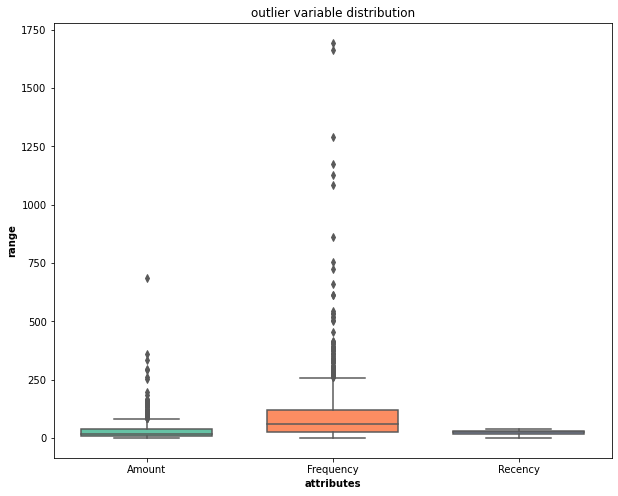

In [31]:
attribute=['Amount','Frequency','Recency']
plt.rcParams['figure.figsize']=[10,8]
sea.boxplot(data=rfm[attribute],orient="v",palette="Set2",whis=1.5,saturation=1,width=0.7)
plt.title('outlier variable distribution')
plt.ylabel('range',fontweight='bold')
plt.xlabel('attributes',fontweight='bold')

In [32]:
# Removing (statistical) outliers for Amount
Q1 = rfm.Amount.quantile(0.05)
Q3 = rfm.Amount.quantile(0.95)
IQR = Q3 - Q1
rfm = rfm[(rfm.Amount >= Q1 - 1.5*IQR) & (rfm.Amount <= Q3 + 1.5*IQR)]

# Removing (statistical) outliers for Recency
Q1 = rfm.Recency.quantile(0.05)
Q3 = rfm.Recency.quantile(0.95)
IQR = Q3 - Q1
rfm = rfm[(rfm.Recency >= Q1 - 1.5*IQR) & (rfm.Recency <= Q3 + 1.5*IQR)]

# Removing (statistical) outliers for Frequency
Q1 = rfm.Frequency.quantile(0.05)
Q3 = rfm.Frequency.quantile(0.95)
IQR = Q3 - Q1
rfm = rfm[(rfm.Frequency >= Q1 - 1.5*IQR) & (rfm.Frequency <= Q3 + 1.5*IQR)]

In [33]:
rfm.shape

(1018, 4)

In [34]:
rfm_df=rfm[['Amount', 'Frequency', 'Recency']]
scaler=StandardScaler()
rfm_df_scaled=scaler.fit_transform(rfm_df)

In [35]:
rfm_df_scaled.shape

(1018, 3)

In [36]:
rfm_df_scaled = pd.DataFrame(rfm_df_scaled)
rfm_df_scaled.columns = ['Amount', 'Frequency', 'Recency']
rfm_df_scaled.head()

,Amount,Frequency,Recency
0,0.084646,-0.004833,0.761371
1,-0.377034,-0.417696,-0.008487
2,2.063273,1.789400,-0.008487
3,0.480371,0.005284,-0.265106
4,0.282508,-0.423581,-0.521726


In [38]:
kmeans =KMeans(n_clusters=3,max_iter=50)
kmeans.fit(rfm_df_scaled)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=50,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [39]:
kmeans.labels_

array([1, 1, 2, ..., 1, 1, 0], dtype=int32)

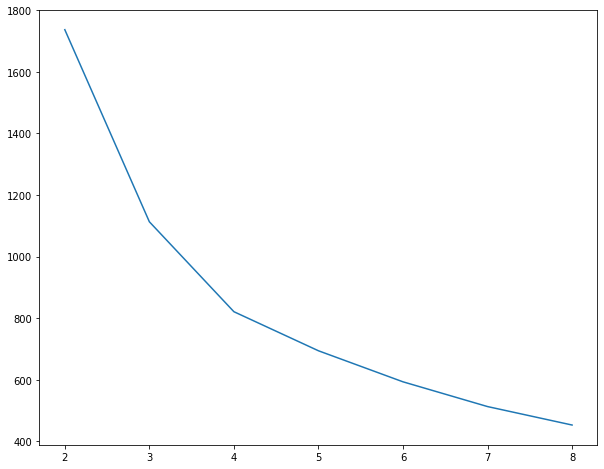

In [42]:
ssd=[]
range_n_clusters=[2,3,4,5,6,7,8]
for num_clusters in range_n_clusters:
  kmeans=KMeans(n_clusters=num_clusters,max_iter=50)
  kmeans.fit(rfm_df_scaled)

  ssd.append(kmeans.inertia_)

plt.plot(range_n_clusters,ssd)

In [43]:
range_n_clusters=[2,3,4,5,6,7,8]
for num_clusters in range_n_clusters:
  kmeans=KMeans(n_clusters=num_clusters,max_iter=50)
  kmeans.fit(rfm_df_scaled)
  cluster_label=kmeans.labels_

  silhouette_avg=silhouette_score(rfm_df_scaled,cluster_label)
  print('For n_cluster={0} the silhouette score is {1}'.format(num_clusters,silhouette_avg))

For n_cluster=2 the silhouette score is 0.530523339870471
For n_cluster=3 the silhouette score is 0.5138891715233318
For n_cluster=4 the silhouette score is 0.48061688754378545
For n_cluster=5 the silhouette score is 0.3794805842865677
For n_cluster=6 the silhouette score is 0.3835946692119759
For n_cluster=7 the silhouette score is 0.38966000758305785
For n_cluster=8 the silhouette score is 0.3795103163908213


In [44]:
kmeans=KMeans(n_clusters=3,max_iter=50)
kmeans.fit(rfm_df_scaled)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=50,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [45]:
rfm['ClusterID']=kmeans.labels_

In [46]:
rfm.head()

,CustomerID,Amount,Frequency,Recency,ClusterID
0,12347.0,31,89.59,32,2
1,12348.0,17,49.60,23,2
2,12370.0,91,263.38,23,1
3,12377.0,43,90.57,20,2
4,12383.0,37,49.03,17,2


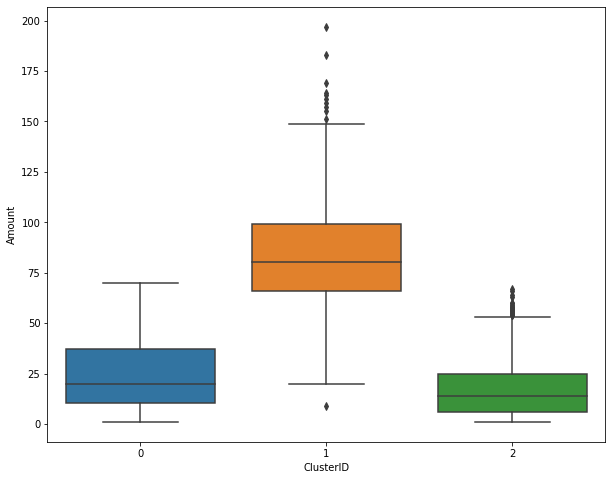

In [48]:
sea.boxplot(x='ClusterID',y='Amount',data=rfm)

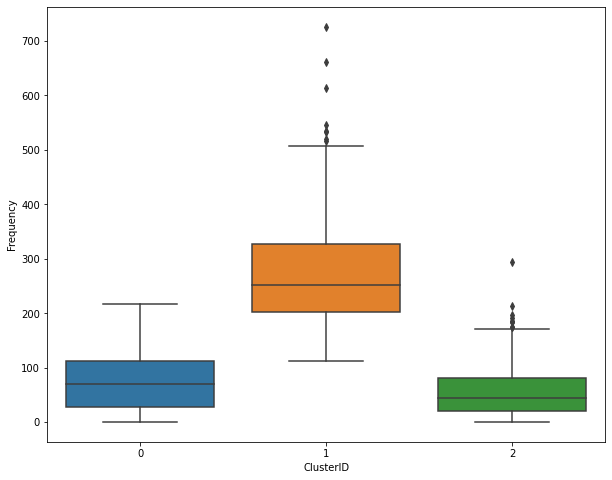

In [49]:
sea.boxplot(x='ClusterID',y='Frequency',data=rfm)

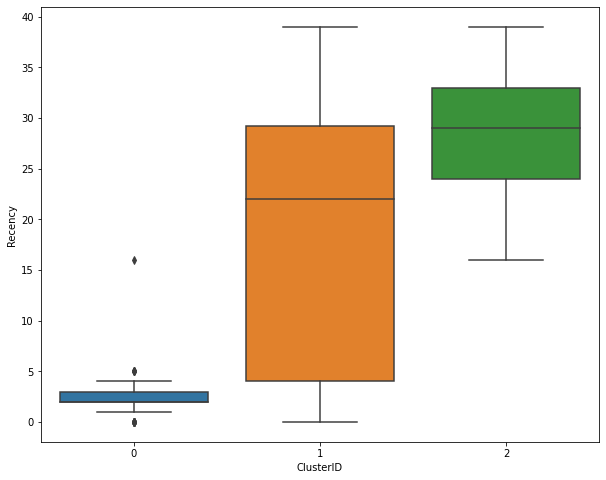

In [51]:
sea.boxplot(x='ClusterID',y='Recency',data=rfm)